In [1]:
# Importing dependencies
import torch
from PIL import Image
from torch import nn,save,load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
# Loading Data

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # MRT ist meist in Graustufen
    transforms.Resize((128, 128)),  # Größe nach Bedarf anpassen
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  #
])
train_dataset = datasets.ImageFolder(root="archive/Training", transform=transform)      #pituitary aus Datensatz rausgelöscht
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [3]:
# Define the image classifier model
class ImageClassifier(nn.Module):
    def __init__(self):
        super(ImageClassifier, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 64, kernel_size=3), 
            nn.ReLU(),
            nn.MaxPool2d(2)
        )


        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 14 *14, 3)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [4]:
# Create an instance of the image classifier model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
classifier = ImageClassifier().to(device)

cpu


In [5]:
# Define the optimizer and loss function
optimizer = Adam(classifier.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [6]:
# Train the model
for epoch in range(10):  
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()  # Reset gradients ----------------------- ?
        outputs = classifier(images)  # Forward pass
        loss = loss_fn(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
    print(f"Epoch:{epoch} loss is {loss.item()}")


Epoch:0 loss is 0.47586938738822937
Epoch:1 loss is 0.32757288217544556
Epoch:2 loss is 0.5658031702041626
Epoch:3 loss is 0.5088974237442017
Epoch:4 loss is 0.1377733051776886
Epoch:5 loss is 0.2610357999801636
Epoch:6 loss is 0.16326986253261566
Epoch:7 loss is 0.08181711286306381
Epoch:8 loss is 0.1525139957666397
Epoch:9 loss is 0.012742915190756321


In [7]:
# Save the trained model
torch.save(classifier.state_dict(), 'model_state.pt')

In [8]:
# Load the saved model
with open('model_state.pt', 'rb') as f: 
     classifier.load_state_dict(load(f))  
       

Predicted class: notumor


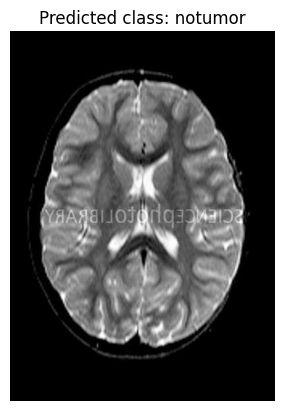

In [12]:

#Testing


import os

#test_pfad = 'archive/Testing'

img = Image.open('archive/Testing/notumor/Te-no_0342.jpg')


img_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  
    transforms.Resize((128, 128)),  # Größe nach Bedarf anpassen
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
img_tensor = img_transform(img).unsqueeze(0).to(device)
class_names = train_dataset.classes 



#for class_name in sorted(os.listdir(test_pfad)):
#    class_folder = os.path.join(test_pfad, class_name)
#    if not os.path.isdir(class_folder):
#        continue
#
#    for img_file in os.listdir(class_folder):
#        if img_file.endswith('.jpg'):
#            img_path = os.path.join(class_folder, img_file)
#
#            img = Image.open(img_path)
#            img_tensor = img_transform(img).unsqueeze(0).to(device)
#
#            with torch.no_grad():
#                output = classifier(img_tensor)
#                predicted_index = torch.argmax(output).item()
#                predicted_label = class_names[predicted_index]

        


with torch.no_grad():
    output = classifier(img_tensor)
    predicted_index = torch.argmax(output).item()
 #Klassennamen laden
predicted_label = class_names[predicted_index]
print(f"Predicted class: {predicted_label}")

import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')  # 'gray', falls es ein Graustufenbild ist
plt.title(f"Predicted class: {predicted_label}")
plt.axis('off')
plt.show()

